In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Task 1: Advanced Exploratory Data Analysis (EDA) & Feature Engineering

### Introduce and Handle Missing Data:

In [10]:
rows = data.shape[0]
print("Total Rows In Dataset :",rows)

Total Rows In Dataset : 21613


In [11]:
np.random.seed(42)
for cols in ["sqft_lot", "bathrooms"]:
    rows = data.sample(frac = 0.05, random_state=np.random.randint(0, 10000)).index
    data.loc[rows, cols] = np.nan

In [12]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1081
sqft_living         0
sqft_lot         1081
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      20532 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       20532 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1. Outlier Detection and Handling:
##### ○ Create boxplots for price, sqft_living, and bedrooms.
##### Identify and remove egregious outliers. A common rule is to remove
##### data points that lie beyond 1.5timesIQR (Interquartile Range) from the
##### first or third quartile. Justify your outlier removal strategy. For
##### instance, does a house with 33 bedrooms seem plausible?

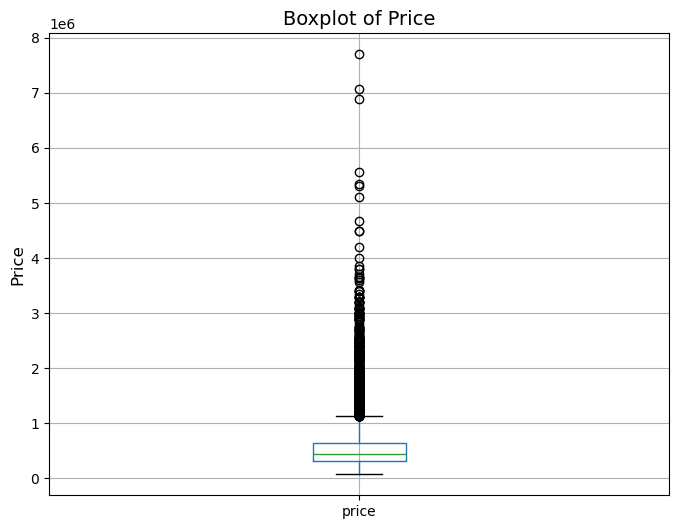

In [14]:
plt.figure(figsize=(8,6))
data[["price"]].boxplot()
plt.title("Boxplot of Price", fontsize=14)
plt.ylabel("Price", fontsize=12)
plt.show()


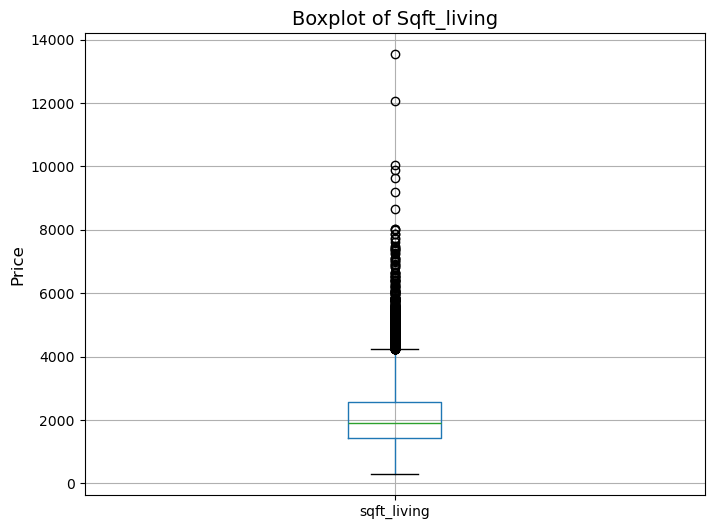

In [15]:
plt.figure(figsize=(8,6))
data[["sqft_living"]].boxplot()
plt.title("Boxplot of Sqft_living", fontsize=14)
plt.ylabel("Price", fontsize=12)
plt.show()

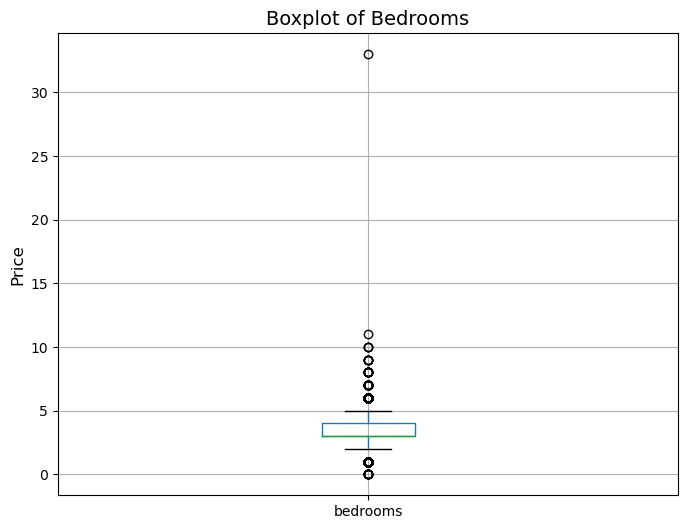

In [16]:
plt.figure(figsize=(8,6))
data[["bedrooms"]].boxplot()
plt.title("Boxplot of Bedrooms", fontsize=14)
plt.ylabel("Price", fontsize=12)
plt.show()

In [17]:
data["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [18]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data_clean = data[(data[column] >= lower) & (data[column] <= upper)]
    return data_clean

In [19]:
data = remove_outliers(data, 'price')
data = remove_outliers(data, 'sqft_living')
data = remove_outliers(data, 'bedrooms')

In [20]:
data["bedrooms"].unique()

array([3, 2, 4, 5])

In [21]:
data["price"].nunique()

3438

In [22]:
data["sqft_living"].nunique()

752

In [23]:
data.shape

(19687, 21)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19687 non-null  int64  
 1   date           19687 non-null  object 
 2   price          19687 non-null  float64
 3   bedrooms       19687 non-null  int64  
 4   bathrooms      18694 non-null  float64
 5   sqft_living    19687 non-null  int64  
 6   sqft_lot       18694 non-null  float64
 7   floors         19687 non-null  float64
 8   waterfront     19687 non-null  int64  
 9   view           19687 non-null  int64  
 10  condition      19687 non-null  int64  
 11  grade          19687 non-null  int64  
 12  sqft_above     19687 non-null  int64  
 13  sqft_basement  19687 non-null  int64  
 14  yr_built       19687 non-null  int64  
 15  yr_renovated   19687 non-null  int64  
 16  zipcode        19687 non-null  int64  
 17  lat            19687 non-null  float64
 18  long       

## 2. Advanced Feature Engineering:  
##### Create the following new features,as they often provide more predictive power than raw data:
##### ○ Date-Based Features: Do not drop the date column. Convert it to a
##### datetime object and engineer the following:
#### ■ sale_year: The year the house was sold.
#### ■ sale_month: The month the house was sold.
#### ■ house_age: The age of the house at the time of sale (sale_year , yr_built).

In [25]:
data["date"] = pd.to_datetime(data["date"] , format = "%Y%m%dT%H%M%S")

In [26]:
data["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 19687, dtype: datetime64[ns]

In [27]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
data["sale_year"] = data["date"].dt.year
data["sale_month"] = data["date"].dt.month

In [30]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [31]:
data.shape

(19687, 23)

In [32]:
data["house_age"] = data["sale_year"] - data["yr_built"]

In [33]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,28


#### ○ Renovation Status:
#### ■ was_renovated: A binary feature (1 if yr_renovated is not 0,else 0).
#### ■ age_since_renovation: Years since renovation. If never renovated, this could be the same as house_age. Think about the best way to handle this.

In [34]:
data["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 2013, 1978, 2005, 2003, 1984, 1954, 2014,
       2011, 1974, 1983, 1945, 1988, 1957, 1977, 1981, 1995, 2000, 1999,
       1970, 1989, 2004, 1994, 1986, 1992, 2009, 1990, 2007, 1987, 1973,
       2006, 2001, 1980, 1971, 1979, 1997, 1969, 2015, 2008, 2012, 1968,
       1963, 1951, 1993, 1962, 1996, 1953, 1998, 1955, 1982, 1950, 1985,
       1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960, 1956, 1967, 1965,
       1934, 1972, 1944])

In [35]:
data["was_renovated"] = data["yr_renovated"].apply(lambda x: 1 if x > 0 else 0)
data["was_renovated"].unique()

array([0, 1])

In [36]:
def calc_age_since_renovation(row):
    if row['yr_renovated'] == 0:  
        return row['house_age']
    else:
        return row['sale_year'] - row['yr_renovated']
data['age_since_renovation'] = data.apply(calc_age_since_renovation, axis=1)

#### ○ Ratio Features: Create at least two insightful ratio features. For
#### example:
#### ■ sqft_living_per_floor: sqft_living / floors. (Handle cases where floors might be 0).
#### ■ bath_per_bed: bathrooms / bedrooms. (Handle cases where bedrooms might be 0).

In [37]:
data['sqft_living_per_floor'] = data['sqft_living'] / data['floors'].replace(0, np.nan)
data['bath_per_bed'] = data['bathrooms'] / data['bedrooms'].replace(0, np.nan)

In [38]:
data["bath_per_bed"].unique()

array([0.33333333, 0.75      , 0.5       , 0.66666667, 0.83333333,
       0.58333333, 0.4       ,        nan, 0.25      , 0.4375    ,
       0.625     , 0.6875    , 0.55      , 0.875     , 0.45      ,
       0.65      , 0.91666667, 1.        , 1.08333333, 1.125     ,
       0.375     , 1.16666667, 0.5625    , 0.7       , 1.25      ,
       0.8       , 0.35      , 0.6       , 1.41666667, 0.8125    ,
       1.5       , 0.3       , 1.375     , 0.2       , 0.41666667,
       0.9375    , 0.95      , 1.625     , 1.0625    , 0.9       ,
       1.33333333, 0.85      , 0.125     , 1.1875    , 0.1875    ,
       1.75      ])

# Task 2: Build a Sophisticated Preprocessing Pipeline

#### 1. Identify Feature Types: After your feature engineering in Task 1, categorize your final columns into three groups:
#### ○ Numerical Features: Continuous variables that need imputation and scaling (e.g., sqft_living, house_age, sqft_lot).
#### ○ Categorical Features: Features that should be treated as categories, not numbers (e.g., zipcode).
#### ○ Passthrough Features: Features you believe don't need scaling or encoding but are still useful (e.g., grade, condition, was_renovated).

In [39]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     19687 non-null  int64         
 1   date                   19687 non-null  datetime64[ns]
 2   price                  19687 non-null  float64       
 3   bedrooms               19687 non-null  int64         
 4   bathrooms              18694 non-null  float64       
 5   sqft_living            19687 non-null  int64         
 6   sqft_lot               18694 non-null  float64       
 7   floors                 19687 non-null  float64       
 8   waterfront             19687 non-null  int64         
 9   view                   19687 non-null  int64         
 10  condition              19687 non-null  int64         
 11  grade                  19687 non-null  int64         
 12  sqft_above             19687 non-null  int64         
 13  sqft_b

In [41]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month',
       'house_age', 'was_renovated', 'age_since_renovation',
       'sqft_living_per_floor', 'bath_per_bed'],
      dtype='object')

In [42]:
numeric_features = [
    'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'lat', 'long', 'sqft_living15', 'sqft_lot15',
    'house_age', 'age_since_renovation',
    'sqft_living_per_floor', 'bath_per_bed',
    'bedrooms', 'bathrooms', 'floors', 'view'
]

categorical_features = ['zipcode']

passthrough_features = ['grade', 'condition', 'was_renovated', 'sale_year', 'sale_month', 'waterfront']

In [43]:
existing = set(X_train.columns)
numeric_features = [c for c in numeric_features if c in existing]
categorical_features = [c for c in categorical_features if c in existing]
passthrough_features = [c for c in passthrough_features if c in existing]

print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)
print('Passthrough features:', passthrough_features)

Numeric features: ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'age_since_renovation', 'sqft_living_per_floor', 'bath_per_bed', 'bedrooms', 'bathrooms', 'floors', 'view']
Categorical features: ['zipcode']
Passthrough features: ['grade', 'condition', 'was_renovated', 'sale_year', 'sale_month', 'waterfront']


#### 2. Create Preprocessing Pipelines for Each Type:
#### ○ Numerical Pipeline: Create a Pipeline that first imputes missing values (using SimpleImputer with a median strategy) and then scales the data (using StandardScaler).
#### ○ Categorical Pipeline: Create a Pipeline that applies OneHotEncoder to the zipcode column. Set handle_unknown='ignore' to prevent errors if the test set contains a zipcode not seen in the training set.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

#### 3. Combine Pipelines with ColumnTransformer:
#### ○ Use ColumnTransformer to apply your numerical pipeline to the numerical columns, your categorical pipeline to the categorical columns, and specify 'passthrough' for the passthrough columns.
#### ○ This ColumnTransformer will be the first step in your final modeling pipeline.

In [45]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features),
    ('pass', 'passthrough', passthrough_features)
])

# Task 3: Model Training and Hyperparameter Tuning

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

grids = {
    'RandomForest': {
        'regressor__n_estimators': [200, 400],
        'regressor__max_depth': [None, 20]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [200, 400],
        'regressor__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'regressor__max_depth': [3, 6, 10],
        'regressor__learning_rate': [0.05, 0.1]
    }
}

results = []
best_overall = None
best_overall_name = None
best_overall_rmse_cv = np.inf
best_overall_estimator = None

for name, est in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', est)])
    param_grid = grids[name]
    print('\nRunning GridSearch for', name)
    gscv = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
    gscv.fit(X_train, y_train)
    best_cv_rmse = -gscv.best_score_
    y_pred = gscv.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({
        'model': name,
        'best_params': gscv.best_params_,
        'cv_rmse': best_cv_rmse,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse
    })
    print(f"{name} done. CV RMSE: {best_cv_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
    if best_cv_rmse < best_overall_rmse_cv:
        best_overall_rmse_cv = best_cv_rmse
        best_overall = gscv
        best_overall_name = name
        best_overall_estimator = gscv.best_estimator_

results = pd.DataFrame(results).sort_values('test_rmse')
results.to_csv(f"model_results.csv", index=False)
results


Running GridSearch for RandomForest
Fitting 3 folds for each of 4 candidates, totalling 12 fits
RandomForest done. CV RMSE: 77801.89 | Test RMSE: 75599.23

Running GridSearch for GradientBoosting
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GradientBoosting done. CV RMSE: 73298.63 | Test RMSE: 72504.99

Running GridSearch for XGBoost
Fitting 3 folds for each of 6 candidates, totalling 18 fits
XGBoost done. CV RMSE: 73154.42 | Test RMSE: 73224.22


,model,best_params,cv_rmse,test_r2,test_mae,test_rmse
1,GradientBoosting,"{'regressor__learning_rate': 0.1, 'regressor__...",73298.627041,0.874263,51597.739761,72504.993719
2,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",73154.421619,0.871756,51442.758154,73224.222823
0,RandomForest,"{'regressor__max_depth': None, 'regressor__n_e...",77801.894939,0.863302,52704.847602,75599.227674


In [53]:
print('Best model (by CV RMSE):', best_overall_name)
best = best_overall
best_pipe = best_overall_estimator
y_best = best.predict(X_test)
final_r2 = r2_score(y_test, y_best)
final_mae = mean_absolute_error(y_test, y_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_best))
print(f"Test R2: {final_r2:.4f}")
print(f"Test MAE: {final_mae:,.2f}")
print(f"Test RMSE: {final_rmse:,.2f}")

Best model (by CV RMSE): XGBoost
Test R2: 0.8718
Test MAE: 51,442.76
Test RMSE: 73,224.22


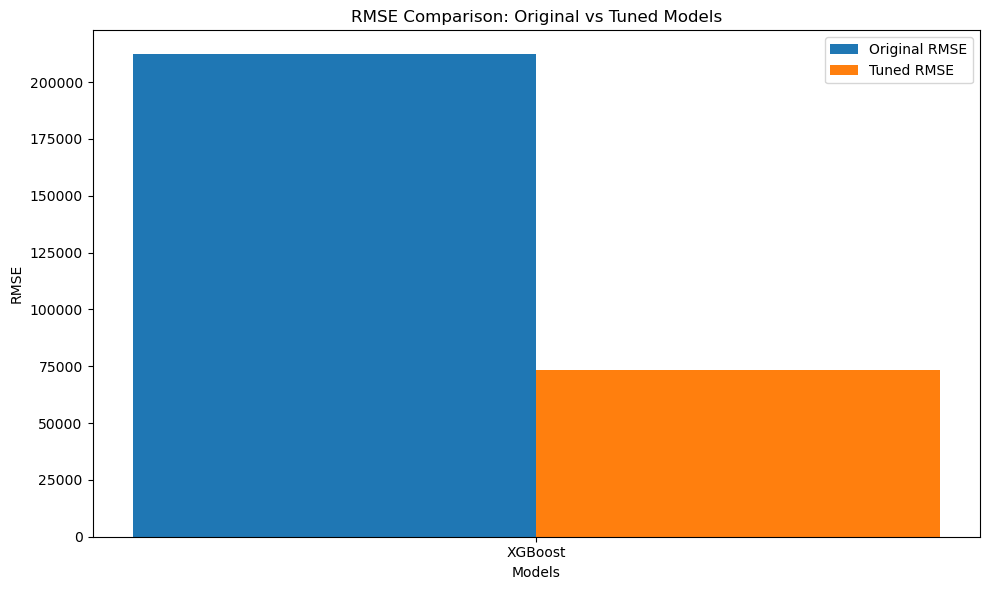

In [73]:
original_results = pd.read_csv('Original_results.csv')
best_models_results = pd.read_csv('model_results.csv')

original_results_renamed = original_results.rename(columns={"Model": "Model", "RMSE": "RMSE_original"})
best_models_results_renamed = best_models_results.rename(columns={"model": "Model", "test_rmse": "RMSE_tuned"})

comparison_df = pd.merge(original_results_renamed[['Model', 'RMSE_original']], 
                         best_models_results_renamed[['Model', 'RMSE_tuned']], 
                         on='Model', 
                         how='inner')

comparison_df['RMSE_Improvement_%'] = 100 * (comparison_df['RMSE_original'] - comparison_df['RMSE_tuned']) / comparison_df['RMSE_original']

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(comparison_df))

plt.bar(index, comparison_df['RMSE_original'], bar_width, label='Original RMSE')
plt.bar([i + bar_width for i in index], comparison_df['RMSE_tuned'], bar_width, label='Tuned RMSE')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison: Original vs Tuned Models')
plt.xticks([i + bar_width/2 for i in index], comparison_df['Model'])
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
comparison_df.head()

,Model,RMSE_original,RMSE_tuned,RMSE_Improvement_%
0,XGBoost,212131.231023,73224.222823,65.48164


In [56]:
comparison_df.to_csv("Improvement_Report.csv",index=False)

##### 3. Feature Importance:
##### ○ If your best model was a tree based model (like RandomForest or XGBoost), extract and plot the feature importances.
##### ○ Important: The feature names from the OneHotEncoder will be generic. You'll need to retrieve the original categorical feature names to make your plot interpretable.

##### ○ Write a brief summary analyzing the top 5 most important features.Do they make sense? Are any of your engineered features in the top 5?


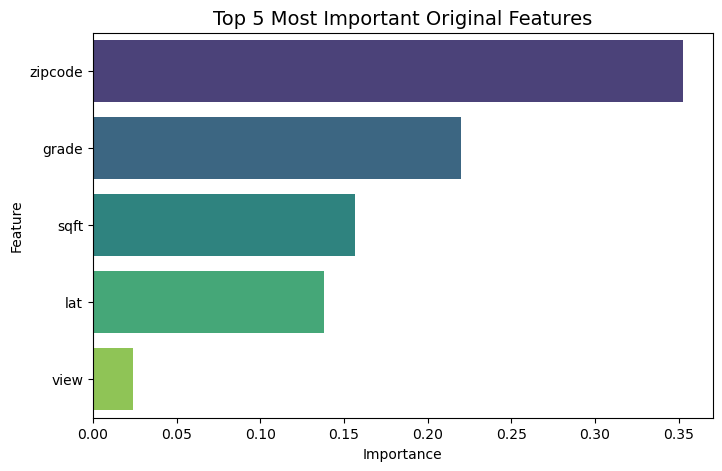

Top 5 Important Features (Grouped):
OriginalFeature
zipcode    0.352750
grade      0.219617
sqft       0.156832
lat        0.137939
view       0.023671
Name: Importance, dtype: float32


In [77]:
import warnings
warnings.filterwarnings('ignore')

pipe = best_overall_estimator  # use your best model's pipeline

# Extract OneHotEncoder features
ohe = pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_features = pipe.named_steps['preprocessor'].transformers_[1][2]
ohe_features = list(ohe.get_feature_names_out(cat_features))

# Get numerical + passthrough features
num_features = pipe.named_steps['preprocessor'].transformers_[0][2]
passthrough_features = pipe.named_steps['preprocessor'].transformers_[2][2]

# Combine all feature names
all_features = num_features + ohe_features + passthrough_features

# Get feature importances from the regressor
importances = pipe.named_steps['regressor'].feature_importances_
feature_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
})

# ✅ Map back to original feature (e.g., zipcode instead of zipcode_98004)
feature_importances['OriginalFeature'] = feature_importances['Feature'].apply(lambda x: x.split('_')[0])

# ✅ Group by original feature
grouped_importances = feature_importances.groupby('OriginalFeature')['Importance'].sum().sort_values(ascending=False)

# Plot top 5 original features
plt.figure(figsize=(8,5))
sns.barplot(x=grouped_importances.head(5).values,
            y=grouped_importances.head(5).index,
            palette='viridis')
plt.title("Top 5 Most Important Original Features", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("Top 5 Important Features (Grouped):")
print(grouped_importances.head(5))


In [78]:
'''
Top 5 Most Important Features :- zipcode, grade, sqrt, lat, view

1. zipcode :-
    zipcode refers to the area of the kings county. More rich area increases house prices and slum area decreases house prices.
    therefore, zipcode is the important feature for this model.

2. grade :-
    grade focuses on construction and quality of house. more grades means better house quality increases house price.
    hence, grade is second most important feature for this model.

3. sqrt :-
    sqrt is directly proportional to price. As sqrt increases price increases.

4. lat :-
    lat refers to latitude or geography of the house. it is also most important feature for this model.

5. view :-
    House with view like garden, open area, mountains typically refers to a premium house.
    it is also most important feature.
'''

'\nTop 5 Most Important Features :- zipcode, grade, sqrt, lat, view\n\n1. zipcode :-\n    zipcode refers to the area of the kings county. More rich area increases house prices and slum area decreases house prices.\n    therefore, zipcode is the important feature for this model.\n\n2. grade :-\n    grade focuses on construction and quality of house. more grades means better house quality increases house price.\n    hence, grade is second most important feature for this model.\n\n3. sqrt :-\n    sqrt is directly proportional to price. As sqrt increases price increases.\n\n4. lat :-\n    lat refers to latitude or geography of the house. it is also most important feature for this model.\n\n5. view :-\n    House with view like garden, open area, mountains typically refers to a premium house.\n    it is also most important feature.\n'